<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/Action_Potential_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

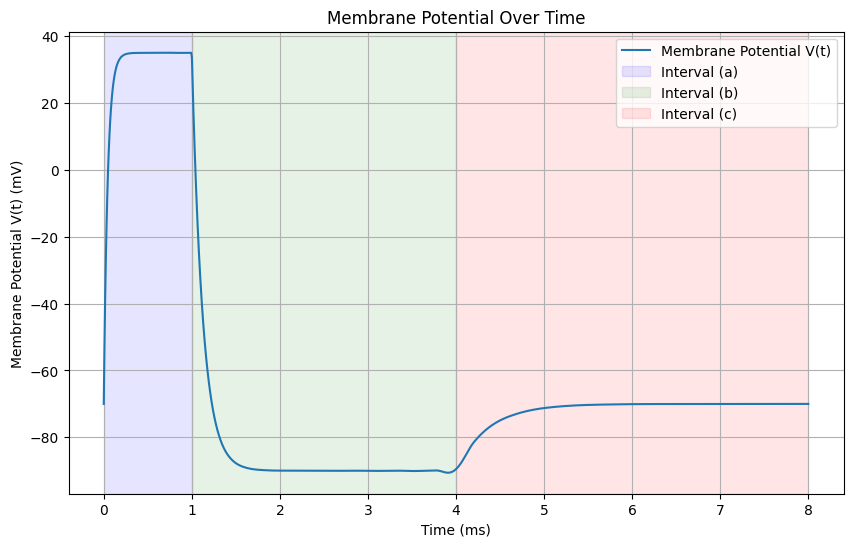

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define constants
E_Na = 50    # Sodium equilibrium potential (mV)
E_K = -90    # Potassium equilibrium potential (mV)
V_rest = -70 # Resting membrane potential (mV)

# Time intervals
t0 = 0       # Start time
t1 = 1       # End of first interval
t2 = 4       # End of second interval
t3 = 8       # End of third interval (arbitrary end time)

# Define the conductance functions
def g_Na(t):
    if 0 <= t < 1:
        return 5.0
    elif 1 <= t < 4:
        return 0.0
    else:
        return 0.1

def g_K(t):
    if 0 <= t < 1:
        return 0.6
    elif 1 <= t < 4:
        return 2.0
    else:
        return 0.6

# Define the differential equation
def dVdt(t, V):
    gNa = g_Na(t)
    gK = g_K(t)
    dV = -4 * (gNa * (V - E_Na) + gK * (V - E_K))
    return dV

# Time points where the solution is computed
t_eval = np.linspace(t0, t3, 1000)

# Solve the ODE
sol = solve_ivp(dVdt, [t0, t3], [V_rest], t_eval=t_eval, method='RK45', vectorized=False)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Membrane Potential V(t)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential V(t) (mV)')
plt.title('Membrane Potential Over Time')
plt.grid(True)

# Highlight the different intervals
plt.axvspan(t0, t1, color='blue', alpha=0.1, label='Interval (a)')
plt.axvspan(t1, t2, color='green', alpha=0.1, label='Interval (b)')
plt.axvspan(t2, t3, color='red', alpha=0.1, label='Interval (c)')

plt.legend()
plt.show()
